[173 208 162 ...  77 122  82]
AxesSubplot(0.125,0.125;0.352273x0.755)
0.24998338207923423


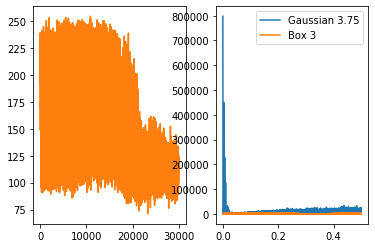

In [99]:
from __future__ import division
from numpy import asarray
from PIL import Image
from scipy import ndimage

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt



N = 100
std = 3.75
box = 3


def MTF(x, window=True):
    """
    Compute the MTF of an edge scan function.
    Parameters
    ----------
    x : 1D ndarray
        Edge scan function.
    window : bool
        Whether to apply Hanning windowing to the input.
    Notes
    -----
    The line spread function is the derivative of the edge scan function.  The
    FFT of the line spread function gives the MTF.
    See Also
    --------
    http://www.cis.rit.edu/research/thesis/bs/2001/perry/thesis.html
    """
    y = np.diff(x)

    if window:
        y = y * np.hanning(len(y))

    y = np.append(y, np.zeros(100))
    Y = np.fft.fft(y)

    return Y[:len(Y) // 2]


# Generate edge
x = np.zeros(N)
# x[:N // 2] = 1

image=Image.open(r"C:\Users\bathu\Desktop\LR_beach1_patch.png")
da=asarray(image)
x = da.flatten()
print (x)

# Pass through various filters
#rearranges the pixel values/ rearanges the array values
y1 = ndimage.gaussian_filter1d(x, 30.75)[5:-5]
y2 = np.convolve(x, 1/box * np.ones(box), mode='same')[5:-5] 

Y1 = MTF(y1)
Y2 = MTF(y2)

f, (ax0, ax1) = plt.subplots(1, 2)
ix = np.arange(len(Y1)) / (2 * len(Y1))

ax0.plot(y1)
ax0.plot(y2)

print(ax0)
print (np.mean(ix))

# for the second graph

ax1.plot(ix, np.abs(Y1), label='Gaussian %.2f' % std)
ax1.plot(ix, np.abs(Y2), label='Box %d' % box)

ax1.legend()

plt.show()